# Bag Of Words

This notebook holds the code of attempting to produce adequate results utilizing the Bag Of Words (BOW) technique. We wanted to leverage BOW's ability to keep track of the frequencies of words to potentially produce results that were more dependendent on the words themselves, rather than vectorized forms of them. 

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('../../../data/processed/tokenized_data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['overall'], test_size=0.2, random_state=42)

X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Initialize and fit the CountVectorizer to transform text data into bag-of-words vectors
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [3]:
# Save the trained models as pickle files
with open('pickle_model/count_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [4]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bow, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Evaluate the model
y_pred = rf_model.predict(X_test_bow)

In [1]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

In [7]:
with open('pickle_model/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [13]:
import pickle
import numpy as np

# Load the RandomForestClassifier model from the pickle file
with open('pickle_model/random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Get the feature importances from the trained RandomForestClassifier model
feature_importances = rf_model.feature_importances_

# Get the indices of the top 20 features
top_20_indices = np.argsort(feature_importances)[::-1][:20]

# Get the feature names from the CountVectorizer object
with open('pickle_model/count_vectorizer.pkl', 'rb') as file:
    count_vectorizer = pickle.load(file)
feature_names = count_vectorizer.get_feature_names_out()

# Get the top 20 feature names and their importances
top_20_feature_names = [feature_names[i] for i in top_20_indices]
top_20_feature_importances = feature_importances[top_20_indices]

# Print the top 20 features and their importances
for feature_name, importance in zip(top_20_feature_names, top_20_feature_importances):
    print(f"{feature_name}: {importance}")


but: 0.016683051818863617
not: 0.015200121328642176
love: 0.013501876412391247
small: 0.01266934315084377
the: 0.010696985876165434
it: 0.010304908986557048
great: 0.009508500001524168
and: 0.00892917574320705
too: 0.008903926765000902
cheap: 0.006870573281037565
very: 0.006720387139475387
is: 0.006628543168724153
to: 0.006526857842904681
was: 0.006497287630591692
perfect: 0.006376332166171575
for: 0.005774328848628302
this: 0.005300217856752167
my: 0.005184085585108547
like: 0.0051785022418648
little: 0.005017222629622709


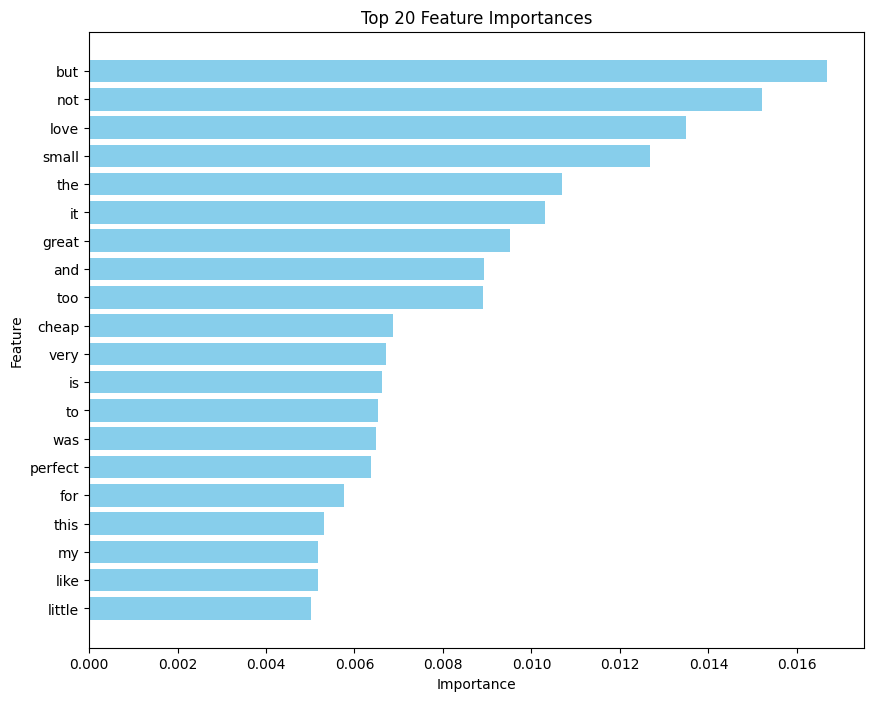

In [14]:
import matplotlib.pyplot as plt

# Plot the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(top_20_feature_names, top_20_feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()
